## Computer vision
### Image matching

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
base_folder = 'drive/My Drive/Lab4/' # change this on your machine
images = glob.glob(os.path.join(base_folder, "*.jpg")) 
print(images)

['drive/My Drive/Lab4/template_math.jpg', 'drive/My Drive/Lab4/test_image_math.jpg', 'drive/My Drive/Lab4/cathedral_img1.jpg', 'drive/My Drive/Lab4/cathedral_img2.jpg']


In [4]:
print(cv.__version__)
# sift doesn't work with version 4.1.2 (is patented)
# in order to make sift working uninstall opencv and install version 3.4.2.16 with opencv-contrib
# 
# pip install opencv-python==3.4.2.16
# pip install opencv-contrib-python==3.4.2.16

4.1.2


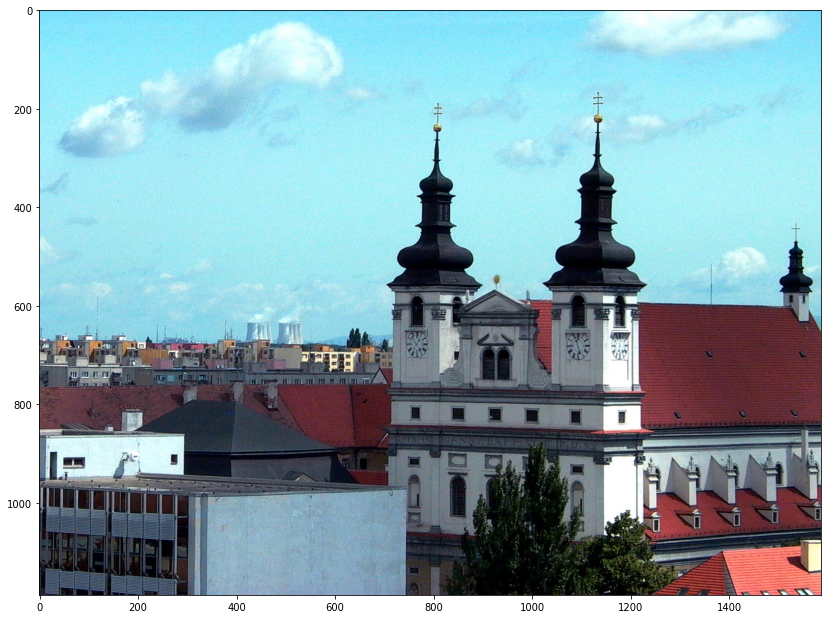

(1187, 1586, 3)


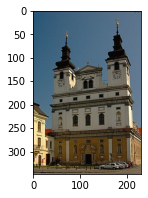

(348, 230, 3)


In [7]:
img1 = cv.imread(base_folder + 'cathedral_img1.jpg')
img2 = cv.imread(base_folder + 'cathedral_img2.jpg')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14, 14))
plt.imshow(img1)
plt.show()
print(img1.shape)

plt.figure(figsize=(3, 3))
plt.imshow(img2)
plt.show()
print(img2.shape)


We will perform **image matching** based on their local features, a.k.a. interest points.

A local image feature is a tiny patch in the image that's invariant to image scaling, rotation and change in illumination. It's like the tip of a tower, or the corner of a window in the image above. Unlike a random point on the background (sky) in the image above, the tip of the tower can be precise detected in most images of the same scene. It is geometricly (translation, rotation, ...) and photometricly (brightness, exposure, ...) invariant.

In [8]:
# create ORB object
orb = cv.ORB_create(nfeatures=5000)
# get the keypoints and the corresponding descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
print('(1) num of keypoints =', len(kp1))
print('(1) num of descriptors =', len(des1))
print('(1) the dimension of one descriptor is', len(des1[1]))
print('(1) the second descriptor is', des1[1])
kp2, des2 = orb.detectAndCompute(img2, None) 
print('(2) num of keypoints =', len(kp2))
print('(2) num of descriptors =', len(des2))

(1) num of keypoints = 5000
(1) num of descriptors = 5000
(1) the dimension of one descriptor is 32
(1) the second descriptor is [ 33  29 243  69 116 110 111 119 113 226 126  64  17  55 149 116 124 252
  50 168 193 178 241 202 101 188 134   0  67 248 102 248]
(2) num of keypoints = 1898
(2) num of descriptors = 1898


In [14]:
print(kp1[0].pt)
print(kp1[0].angle)

(129.0, 735.0)
10.881855010986328


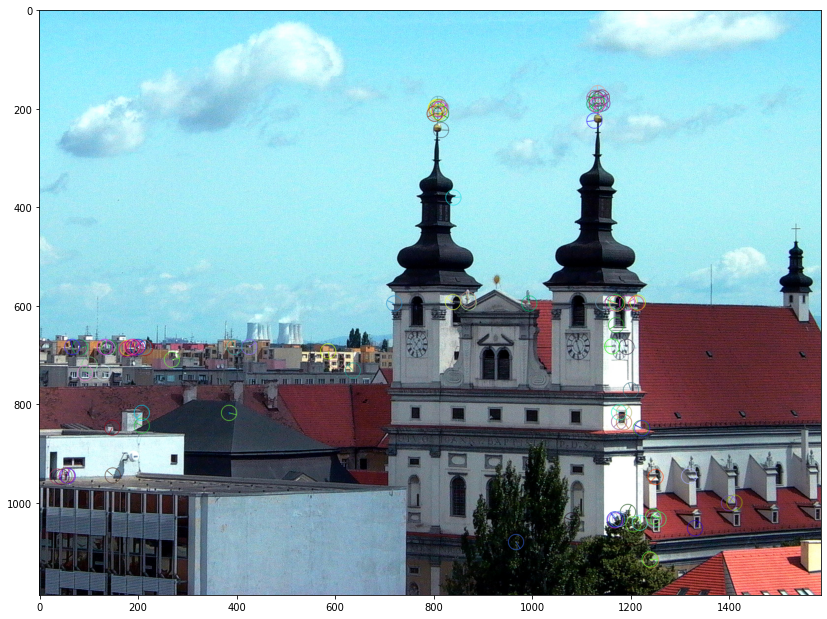

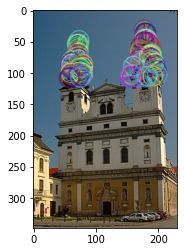

In [17]:
# drawing keypoints
drawing_img1 = np.copy(img1)
cv.drawKeypoints(img1, kp1[:100], drawing_img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(14, 14))
plt.imshow(drawing_img1)
plt.show()

# drawing keypoints
drawing_img2 = np.copy(img2)
cv.drawKeypoints(img2, kp2[:100], drawing_img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(4, 4))
plt.imshow(drawing_img2)
plt.show()

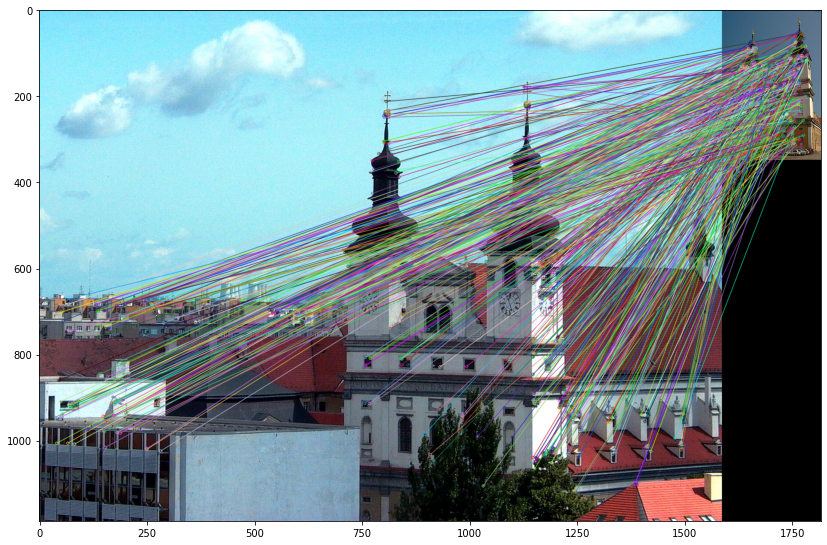

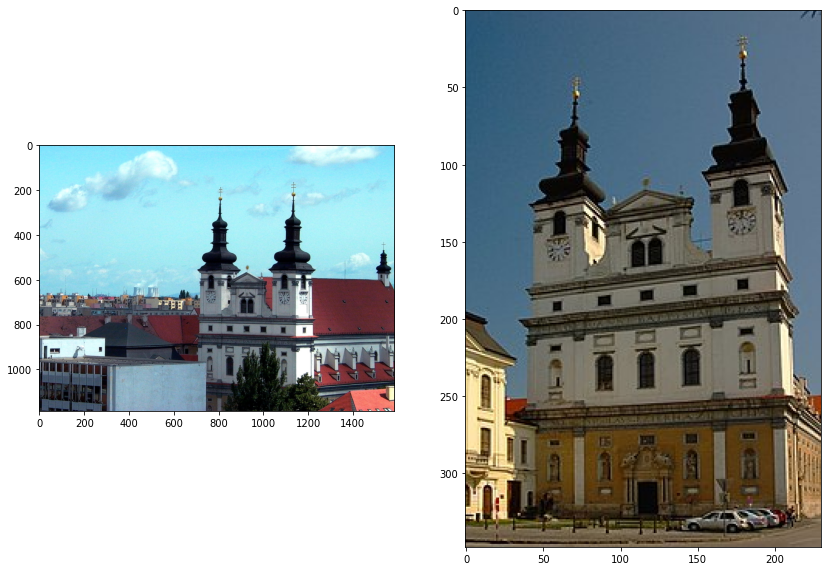

In [20]:
# help here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
# https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html

# create BFMatcher object
# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2) # query_image, train_image
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 50 matches.
plt.figure(figsize=(14, 14))
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:1898], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()


In [22]:
#DMatch.distance - Distance between descriptors. The lower, the better it is.
#DMatch.trainIdx - Index of the descriptor in train descriptors
#DMatch.queryIdx - Index of the descriptor in query descriptors
#DMatch.imgIdx - Index of the train image.
match = matches[0]
print(match.distance)
print(match.queryIdx)
first_desc = des1[match.queryIdx]
print(match.trainIdx)
second_desc = des2[match.trainIdx]
print(first_desc)
print(second_desc)

19.0
2347
560
[ 49  73  75 236  20 131 239 240  68  64 210  66  51 193 177  96 120 168
  23 235 201 179   4  61 240 168 170 128  61 187 112 168]
[ 49  73  75 174  84 135 207 240 196  64 208 198 115 197 177  96 124 232
  23 239 201 179  52  61 240 168 170 136  61 187 112 248]


###  Project 1 - Automatic grading of multiple choice tests

(2889, 2401, 3)
(1146, 1092, 3)


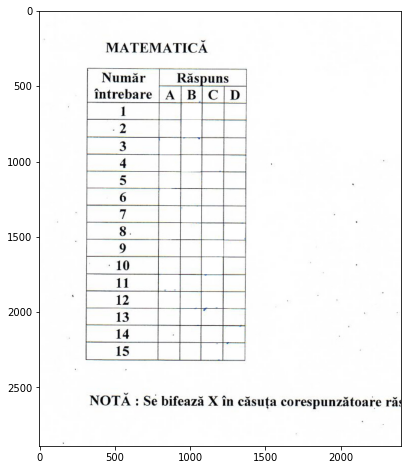

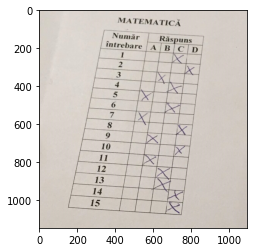

In [24]:
img_template = cv.imread(base_folder + 'template_math.jpg')
img_query = cv.imread(base_folder + 'test_image_math.jpg')

img_template = cv.cvtColor(img_template, cv.COLOR_BGR2RGB)
img_query = cv.cvtColor(img_query, cv.COLOR_BGR2RGB)

img1 = img_template
img2 = img_query

print(img1.shape)
print(img2.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_template)
plt.show()

plt.figure(figsize=(4, 4))
plt.imshow(img_query)
plt.show()


In [ ]:
points_template = np.float32([(322, 384), (1373, 382), (314, 2304), (1369, 2324)]) # the points of the 4 corners (table) in the template image
points_query = np.float32([(345, 105), (862, 138), (154, 1035), (747, 1075)]) # the points of the 4 corners (table) in the test image

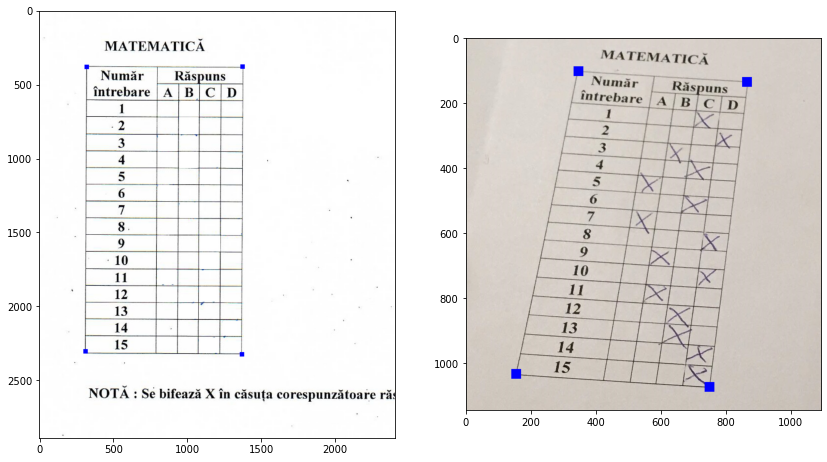

In [27]:
# use it only for plotting the points in the images
img_template_with_points = img_template.copy()
img_query_with_points = img_query.copy()
step = 15
for i in range(len(points_template)): 
    img_template_with_points[int(points_template[i, 1] - step):int(points_template[i, 1] + step), int(points_template[i, 0] - step):int(points_template[i, 0] + step)] = [0, 0, 255]
    img_query_with_points[int(points_query[i, 1] - step):int(points_query[i, 1] + step), int(points_query[i, 0] - step):int(points_query[i, 0] + step)] = [0, 0, 255]

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(img_template_with_points) 
plt.subplot(1, 2, 2)
plt.imshow(img_query_with_points)
plt.show()


[[ 1.99173812e+00  4.49014877e-01 -4.10327184e+02]
 [-1.64025648e-01  2.40016081e+00  1.90920122e+02]
 [-2.76654946e-05  1.49138979e-04  1.00000000e+00]]


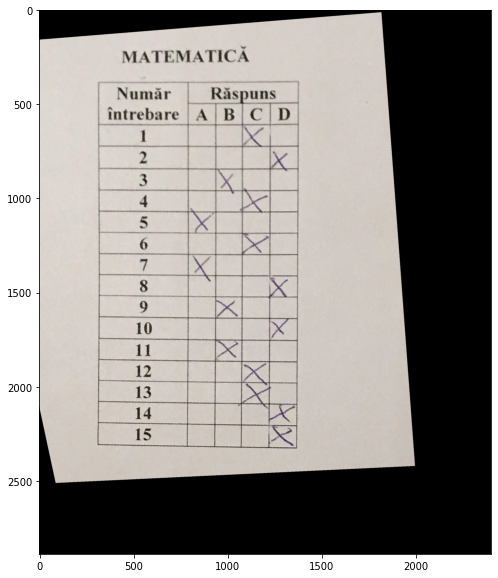

In [29]:
# find the homography given the 8 points
homography = cv.getPerspectiveTransform(points_query, points_template) # first param - the points from the test image
                                                          # the second param - the points from the template image

print(homography)

# use homography to get the aligned image 
height, width, _ = img_template.shape # the shape with respect to the template image
aligned_image2 = cv.warpPerspective(img_query, homography, (width, height), flags=cv.INTER_NEAREST)
plt.figure(figsize=(10, 10))
plt.imshow(aligned_image2); 
plt.show()


In [31]:
print(homography)
print(points_query)
print(points_template)

[[ 1.99173812e+00  4.49014877e-01 -4.10327184e+02]
 [-1.64025648e-01  2.40016081e+00  1.90920122e+02]
 [-2.76654946e-05  1.49138979e-04  1.00000000e+00]]
[[ 345.  105.]
 [ 862.  138.]
 [ 154. 1035.]
 [ 747. 1075.]]
[[ 322.  384.]
 [1373.  382.]
 [ 314. 2304.]
 [1369. 2324.]]


In [35]:
point = [[points_query[0][0]],[points_query[0][1]],[1]]
print(point)
print(np.dot(homography,point))
print(323.96902909/1.006115)
print(386.34815892/1.006115)

[[345.0], [105.0], [1]]
[[323.96902909]
 [386.34815892]
 [  1.006115  ]]
321.99999909553077
383.99999892656405


In [36]:
# TODO: find the homography using ORB features
# create ORB object
orb = cv.ORB_create(nfeatures=5000)
# get the keypoints and the corresponding descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
print('(1) num of keypoints =', len(kp1))
print('(1) num of descriptors =', len(des1))
print('(1) the dimension of one descriptor is', len(des1[1]))
print('(1) the second descriptor is', des1[1])
kp2, des2 = orb.detectAndCompute(img2, None) 
print('(2) num of keypoints =', len(kp2))
print('(2) num of descriptors =', len(des2))

(1) num of keypoints = 5000
(1) num of descriptors = 5000
(1) the dimension of one descriptor is 32
(1) the second descriptor is [147  22 231 157  86 178 248 115 117  67  82 247   8  46 182 105 237 173
 191 133 188 221  37 206  22  46 218 194 165 132  53 221]
(2) num of keypoints = 5000
(2) num of descriptors = 5000


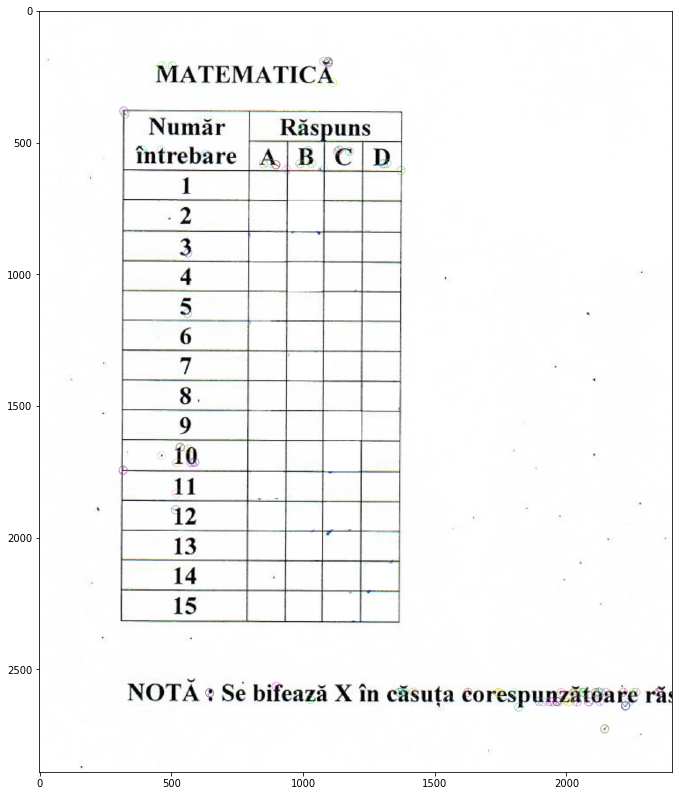

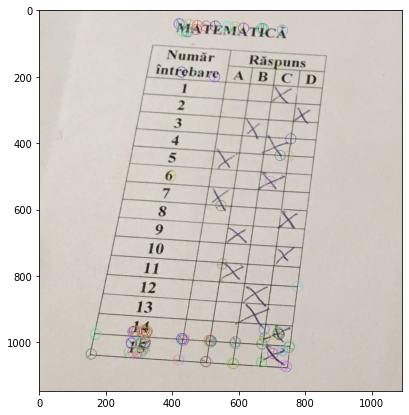

In [37]:
# drawing keypoints
drawing_img1 = np.copy(img1)
cv.drawKeypoints(img1, kp1[:100], drawing_img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(14, 14))
plt.imshow(drawing_img1)
plt.show()

# drawing keypoints
drawing_img2 = np.copy(img2)
cv.drawKeypoints(img2, kp2[:100], drawing_img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(7, 7))
plt.imshow(drawing_img2)
plt.show()

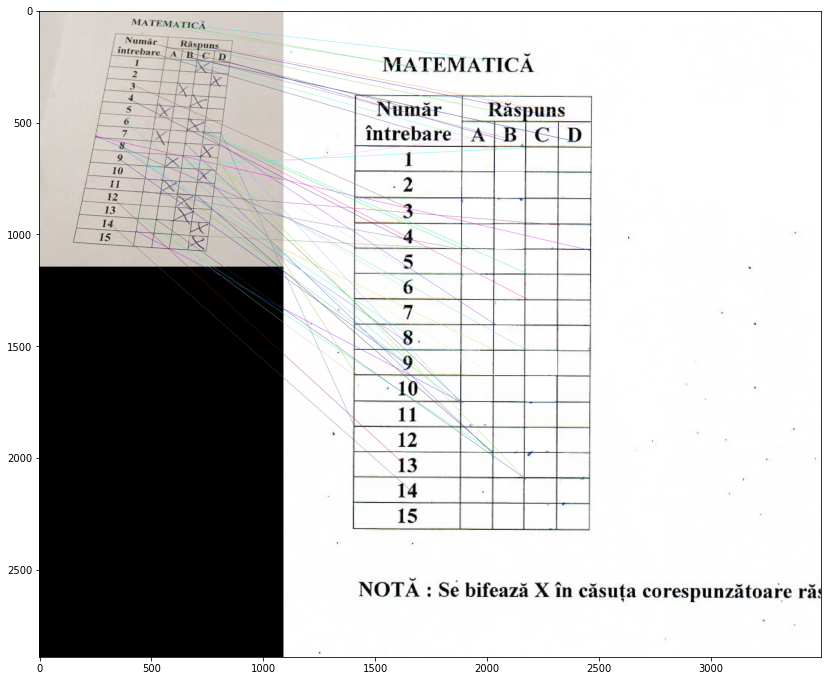

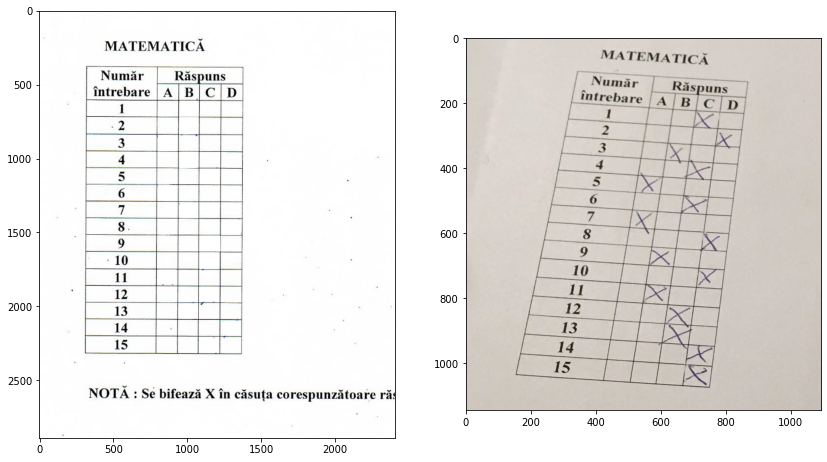

In [39]:
# create BFMatcher object
# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des2, des1) # query_image, train_image
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 50 matches.
plt.figure(figsize=(14, 14))
img3 = cv.drawMatches(img2, kp2, img1, kp1, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()


In [43]:
print(len(matches))
match = matches[0]
print(match.distance)
print(match.queryIdx)
second_desc = des2[match.queryIdx]
print(match.trainIdx)
first_desc = des1[match.trainIdx]
print(first_desc)
print(second_desc)

1122
14.0
1184
4019
[ 82  89 118 222  95 212 158 230 137  72 218 163  44 190  55  99 238 243
 191 193 196 139  50 237  51  56 202 139  23  55  53  95]
[ 82  89 102 158  95 212 190 228 141  72 218 167  44 254  55  99 238 243
 191 195 196 139  50 237  49  40 202 139  21  62  53 223]


In [46]:
template_points = np.zeros((len(matches),2),dtype=np.float32)
query_points = np.zeros((len(matches),2),dtype=np.float32)

for i,m in enumerate(matches):
  template_points[i,:] = kp1[m.trainIdx].pt
  query_points[i,:] = kp2[m.queryIdx].pt

print(template_points.shape)
print(template_points)

print(query_points.shape)
print(query_points)




(1122, 2)
[[ 686.7765   268.73862]
 [ 880.86554  582.267  ]
 [ 798.00006 1068.     ]
 ...
 [1787.04    2580.48   ]
 [ 636.       560.     ]
 [ 630.72003  437.76   ]]
(1122, 2)
[[ 530.4        69.600006]
 [ 606.24005   207.36002 ]
 [ 466.56003   807.84    ]
 ...
 [ 492.48004   153.792   ]
 [ 694.6561   1034.7266  ]
 [ 725.5943   1021.2068  ]]


In [48]:
H, mask = cv.findHomography(query_points, template_points, cv.RANSAC)
print(H),
print(mask)
print('number of inliers = ', sum(mask))


[[ 2.07132870e+00  4.60907106e-01 -4.30505766e+02]
 [-1.34868735e-01  2.47958127e+00  1.74173007e+02]
 [ 1.62530284e-05  1.66301452e-04  1.00000000e+00]]
[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
number of inliers =  [203]


In [49]:
print(H)
print(homography)

[[ 2.07132870e+00  4.60907106e-01 -4.30505766e+02]
 [-1.34868735e-01  2.47958127e+00  1.74173007e+02]
 [ 1.62530284e-05  1.66301452e-04  1.00000000e+00]]
[[ 1.99173812e+00  4.49014877e-01 -4.10327184e+02]
 [-1.64025648e-01  2.40016081e+00  1.90920122e+02]
 [-2.76654946e-05  1.49138979e-04  1.00000000e+00]]


In [52]:
point1 = [[query_points[0][0]],[query_points[0][1]],[1]]
point2 = [[template_points[0][0]],[template_points[0][1]],[1]]
w1 = np.dot(H,point1)
print('we have obtained the point \n',w1[0]/w1[2],w1[1]/w1[2])
print('We wanted to obtian the points', point2[0],point2[1])

we have obtained the point 
 [686.34529225] [269.76945369]
We wanted to obtian the points [686.7765] [268.73862]


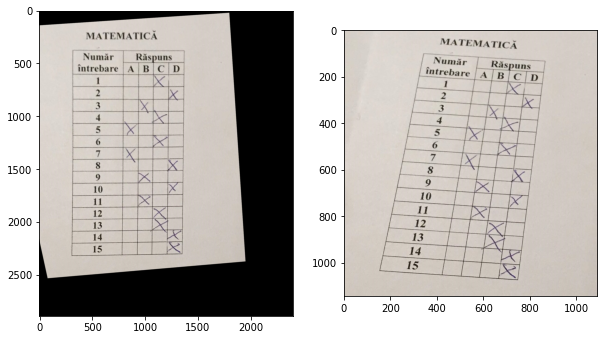

In [55]:
# use homography to get the aligned image 
height, width, _ = img_template.shape # the shape with respect to the template image
warped_image = cv.warpPerspective(img_query, H, (width, height), flags=cv.INTER_NEAREST)
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(warped_image);
plt.subplot(1,2,2)
plt.imshow(img_query) 
plt.show()
